## ✅ 2. Data Cleaning & Preprocessing
This step includes:

1. Data Loading
2. Missing Values
3. Data Type Conversion
4. Outlier Treatment
5. Working with Categorical Features
6. Feature Engineering

### 2.1. Data Loading

Dataset: Credit Card User Behaviour Dataset
After loading the data, a primary check of the table structure was performed: number of rows, columns, data types, basic statistics.

In [ ]:
import pandas as pd
import numpy as np

# --- 2.1. loading data ---
df = pd.read_csv('BankChurners.csv')

# --- BASIC OVERVIEW ---
print(df.shape)

(10127, 23)


In [58]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [52]:
print(df.head())

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1       

In [ ]:
df.rename(columns={
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'NB_Attr1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'NB_Attr2'
}, inplace=True)

In [60]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NB_Attr1,NB_Attr2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### 2.2. Missing Values

A check for missing values ​​was performed for each feature.
Goal: Determine which columns require filling, deletion, or transformation.
- If the missing value percentage is <5%, they are filled (e.g., with the median/mode).
- If the missing value percentage is >30%, feature deletion or simplification is possible.
- For categorical columns, mode or "Unknown" filling is used.

In [61]:
# --- 2.2. MISSING VALUES ---
missing = df.isnull().sum()
print("Missing values:\n", missing)

# Fill small % missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(value={col: df[col].mode()[0]}, inplace=True)
        # df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(value={col: df[col].median()}, inplace=True)
        # df[col].fillna(df[col].median(), inplace=True)

Missing values:
 CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
NB_Attr1                    0
NB_Attr2                    0
dtype: int64


/var/folders/6b/bn6flyvs6yq7n2d128fxvg780000gp/T/ipykernel_31679/2116043229.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(value={col: df[col].median()}, inplace=True)
/var/folders/6b/bn6flyvs6yq7n2d128fxvg780000gp/T/ipykernel_31679/2116043229.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

### 2.3. Data Type Conversion

Some variables can be represented as objects (strings), although they are essentially categorical or numeric.

Typical conversions:
- Converting numeric values ​​(income, balance, transactions) to float - arleady exist;
- Converting categories to categories;
- Converting binary features to 0/1.

This affects the correctness of the EDA and optimizes memory.

In [62]:
# --- 2.3. CONVERT TYPES ---
# Convert categorical columns to "category"
cat_cols = ['Gender','Education_Level','Income_Category','Marital_Status',
            'Card_Category','Attrition_Flag']
for col in cat_cols:
    df[col] = df[col].astype('category')

# ----- REMOVE LOGICALLY WRONG VALUES -----
df = df[df['Total_Trans_Amt'] >= 0]
df = df[df['Total_Revolving_Bal'] >= 0]

### 2.4. Outlier Treatment

Financial indicators (Credit Limit, Total Revolving Balance, Transaction Amount) have long-tailed distributions.

The following methods are used:
- IQR (interquartile range) for identifying outliers;
- Visualization (boxplot);
- If necessary, winsorization (cutoff at the 1st–99th percentile).

Outliers are not blindly removed → they may be characteristic of credit behavior.
Only illogical values ​​(e.g., negative balance) are removed.

In [63]:

# --- OUTLIERS ---
# Winsorization at 1% and 99%
num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

# for col in num_cols:
#     low = df[col].quantile(0.01)
#     high = df[col].quantile(0.99)
#     df[col] = np.clip(df[col], low, high)

CLIENTNUM: 0 outliers
Customer_Age: 2 outliers
Dependent_count: 0 outliers
Months_on_book: 386 outliers
Total_Relationship_Count: 0 outliers
Months_Inactive_12_mon: 331 outliers
Contacts_Count_12_mon: 629 outliers
Credit_Limit: 984 outliers
Total_Revolving_Bal: 0 outliers
Avg_Open_To_Buy: 963 outliers
Total_Amt_Chng_Q4_Q1: 396 outliers
Total_Trans_Amt: 896 outliers
Total_Trans_Ct: 2 outliers
Total_Ct_Chng_Q4_Q1: 394 outliers
Avg_Utilization_Ratio: 0 outliers
NB_Attr1: 1691 outliers
NB_Attr2: 1688 outliers


### 2.5. Working with Categorical Features

Categorical variables:

- Gender
- Education Level
- Income Category
- Marital Status
- Card Category
- Attrition_Flag

Encoding strategies:
- Label Encoding — for binary categories (Male/Female, Attrited/Existing)
- One-Hot Encoding — for multi-valued categories
- Ordinal Encoding — if there is a logical order (probably it's not correct to use for Education_Level & Income Category due to Unknown values)

In [64]:
# ----- ENCODING -----
# Binary encoding
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Attrited Customer': 1,
                                                 'Existing Customer': 0})

df['Gender'] = df['Gender'].map({'F':1, 'M':0})

# One-hot encoding 
df = pd.get_dummies(df, columns=[#'Education_Level','Income_Category',
                                 'Marital_Status','Card_Category'], drop_first=True)

# Ordinal Encoding
education_order = [
    'Unknown',
    'Uneducated',
    'High School',
    'College',
    'Graduate',
    'Post-Graduate',
    'Doctorate'
]
income_order = [
    'Unknown',
    'Less than $40K',
    '$40K - $60K',
    '$60K - $80K',
    '$80K - $120K',
    '$120K +'
]

from sklearn.preprocessing import OrdinalEncoder

ord_encoder = OrdinalEncoder(categories=[education_order, income_order])

df[['Education_Level', 'Income_Category']] = ord_encoder.fit_transform(
    df[['Education_Level', 'Income_Category']]
)

### 2.6. Feature Engineering

New features:
- Total_Interaction = Contacts_Count_12_mon + Months_Inactive_12_mon
- Spending_Ratio = Total_Trans_Amt / Credit_Limit
- Transaction_Frequency = Total_Trans_Ct / Months_on_book

These features increase the analytical value of the data & help better explain churn.

In [65]:
# ----- FEATURE ENGINEERING -----
df['Total_Interaction'] = df['Contacts_Count_12_mon'] + df['Months_Inactive_12_mon']
df['Spending_Ratio'] = df['Total_Trans_Amt'] / (df['Credit_Limit'] + 1)
df['Transaction_Frequency'] = df['Total_Trans_Ct'] / (df['Months_on_book'] + 1)

# Final shape
print("Final dataset shape:", df.shape)

df.to_csv("cleaned_credit_card_users.csv", index=False)

Final dataset shape: (10127, 30)


### 2.7. Final Dataset

After cleaning and transformation, the resulting dataset is structured and suitable for further analysis (EDA).

## ✅ 3. Exploratory Data Analysis (EDA)

This step includes:
1. General understanding of the data
2. Statistics on key features
3. Visualizations
4. Interpretation of identified patterns

In [66]:
# --- 3.1. General review ---
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           10127 non-null  float64 
 6   Income_Category           10127 non-null  float64 
 7   Months_on_book            10127 non-null  int64   
 8   Total_Relationship_Count  10127 non-null  int64   
 9   Months_Inactive_12_mon    10127 non-null  int64   
 10  Contacts_Count_12_mon     10127 non-null  int64   
 11  Credit_Limit              10127 non-null  float64 
 12  Total_Revolving_Bal       10127 non-null  int64   
 13  Avg_Open_To_Buy           10127 non-null  floa

In [67]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NB_Attr1,NB_Attr2,Total_Interaction,Spending_Ratio,Transaction_Frequency
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,2.601955,2.085711,35.928409,3.812580,2.341167,2.455317,8631.953698,...,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003,4.796485,1.041533,1.863514
std,3.690378e+07,8.016814,1.298908,1.700417,1.474639,7.986416,1.554408,1.010622,1.106225,9088.776650,...,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301,1.520209,0.937505,0.867746
min,7.080821e+08,26.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,...,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420,0.000000,0.018104,0.185185
25%,7.130368e+08,41.000000,1.000000,1.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,...,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660,4.000000,0.303447,1.239048
50%,7.179264e+08,46.000000,2.000000,3.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,...,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820,5.000000,0.727013,1.808511
75%,7.731435e+08,52.000000,3.000000,4.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,...,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900,6.000000,1.552628,2.296296
max,8.283431e+08,73.000000,5.000000,6.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,...,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990,12.000000,5.078403,9.071429


In [68]:
df['Attrition_Flag'].value_counts(normalize=True)

Attrition_Flag
0    0.83934
1    0.16066
Name: proportion, dtype: float64

In [69]:
# --- 3.2. Statistics ---

df[['Customer_Age','Credit_Limit','Total_Trans_Amt','Total_Trans_Ct',
    'Avg_Utilization_Ratio']].describe()


,Customer_Age,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,8631.953698,4404.086304,64.858695,0.274894
std,8.016814,9088.776650,3397.129254,23.472570,0.275691
min,26.000000,1438.300000,510.000000,10.000000,0.000000
25%,41.000000,2555.000000,2155.500000,45.000000,0.023000
50%,46.000000,4549.000000,3899.000000,67.000000,0.176000
75%,52.000000,11067.500000,4741.000000,81.000000,0.503000
max,73.000000,34516.000000,18484.000000,139.000000,0.999000


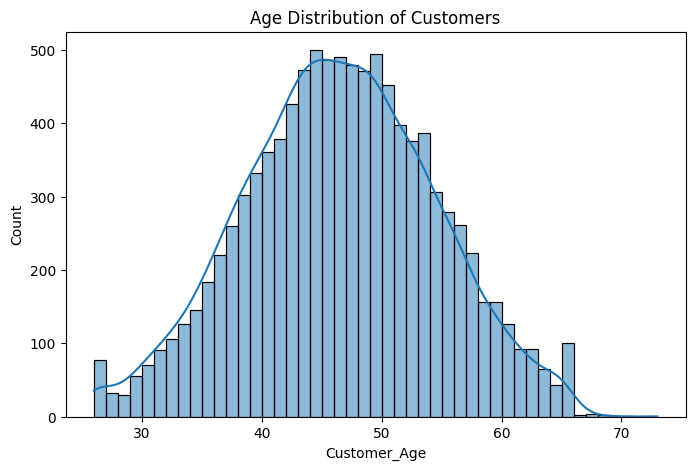

In [70]:
# --- 3.3. Visualizations ---

# Distribution of customer age (26, 65)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['Customer_Age'], kde=True)
plt.title("Age Distribution of Customers")
plt.show()

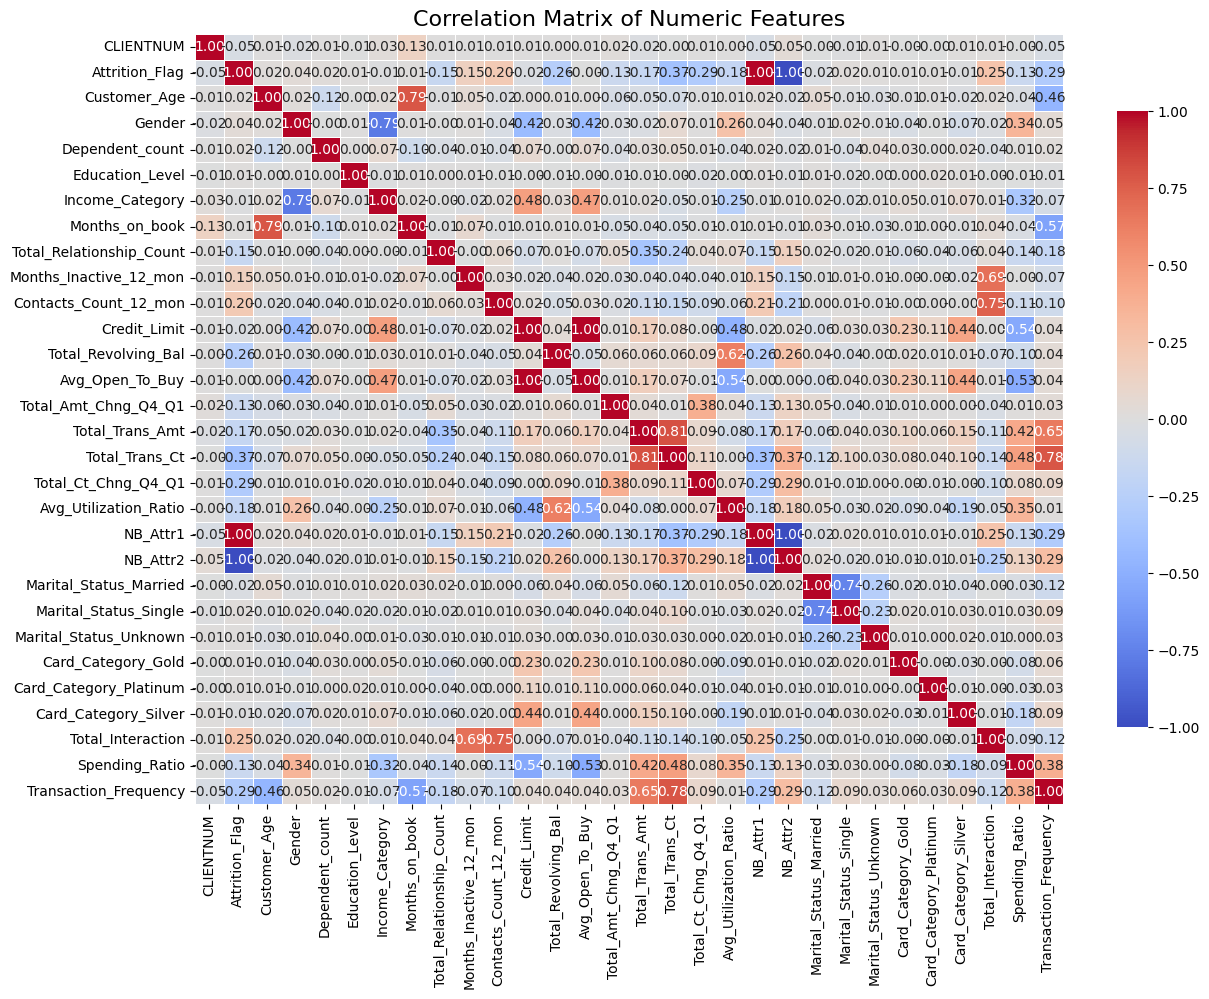

In [73]:
# Correlation matrix

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f",
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.show()

- Red = positive association
- Blue = negative association
- The darker the association, the stronger the association

/var/folders/6b/bn6flyvs6yq7n2d128fxvg780000gp/T/ipykernel_31679/552060252.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition_Flag', y='Total_Trans_Ct', data=df,


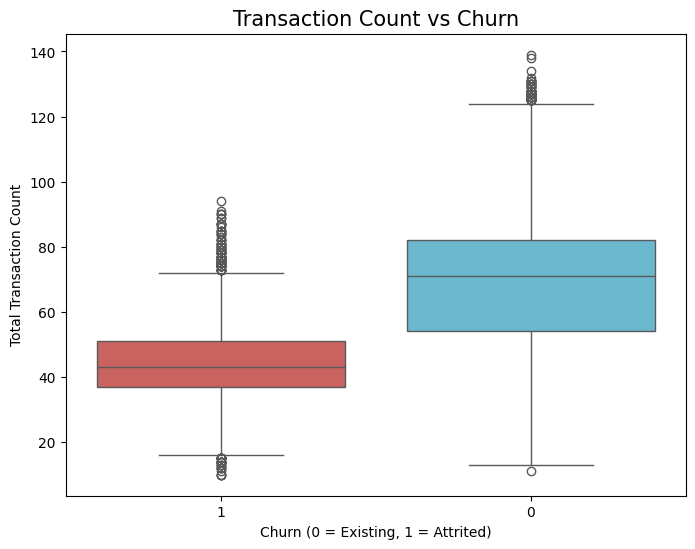

In [ ]:
# Boxplot: Transaction Count vs Churn

plt.figure(figsize=(8,6))
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Ct', data=df,
            palette={'0': "#5bc0de", '1': "#d9534f"})
plt.xlabel("Churn (0 = Existing, 1 = Attrited)")
plt.ylabel("Total Transaction Count")
plt.title("Transaction Count vs Churn", fontsize=15)
plt.show()


- Churned customers have significantly fewer transactions.
- This is one of the strongest predictors.
- "Cold," inactive customers are more likely to churn.

/var/folders/6b/bn6flyvs6yq7n2d128fxvg780000gp/T/ipykernel_31679/3108664454.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition_Flag', y='Avg_Utilization_Ratio',


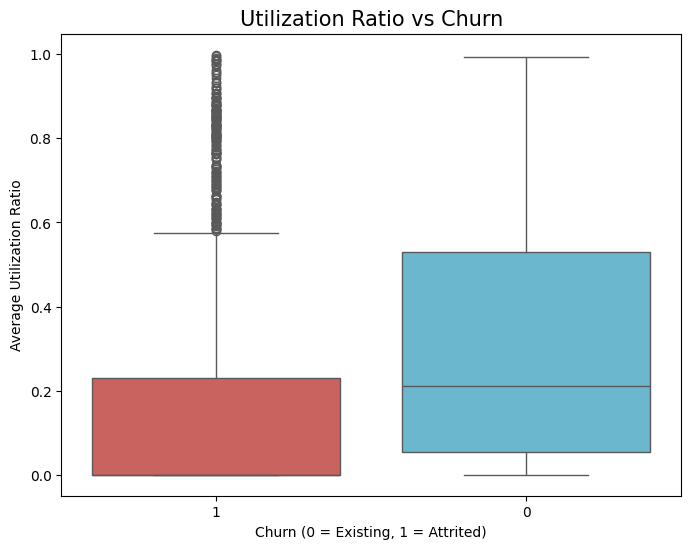

In [ ]:
# Boxplot: Utilization Ratio vs Churn

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Attrition_Flag', y='Avg_Utilization_Ratio',
            palette={'0': "#5bc0de", '1': "#d9534f"})
plt.xlabel("Churn (0 = Existing, 1 = Attrited)")
plt.ylabel("Average Utilization Ratio")
plt.title("Utilization Ratio vs Churn", fontsize=15)
plt.show()


- High credit limit utilization is a sign of activity.
- Low utilization → customers rarely use the card → risk of churn.
- Churn has a lower median.

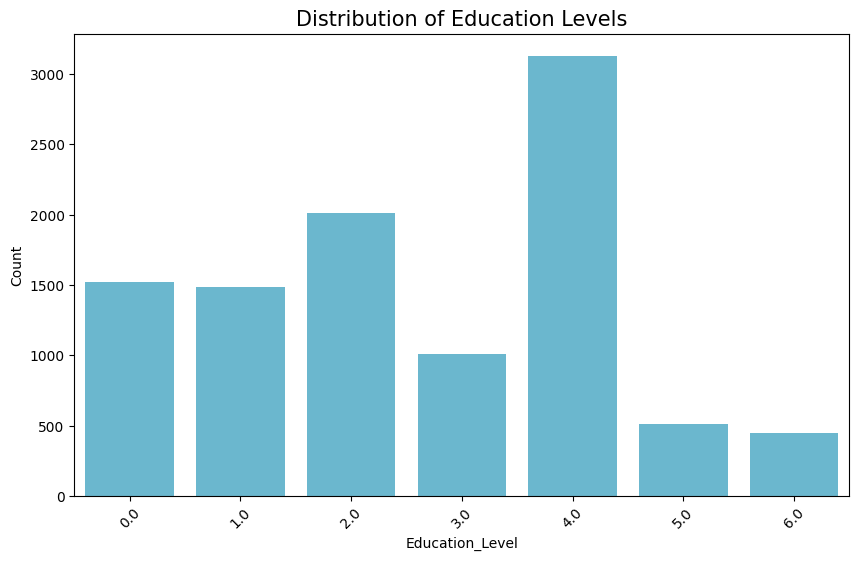

In [80]:
# Countplot of a categorical feature (education)

plt.figure(figsize=(10,6))
sns.countplot(x='Education_Level', data=df, color="#5bc0de")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Distribution of Education Levels", fontsize=15)
plt.show()



- Shows the distribution of categories
- Clears out whether the data set is uniform or skewed (4.0 - graduated)

### 🔶 Key Findings

1. Customer age is evenly distributed:
- peaking at around 45–55 years old.
- small peaking at 26 (first job) and 65 (retirement) years old.

2. Customers who churned have:
- significantly lower number of transactions
- lower total transaction volume
- lower credit utilization

3. Correlations:
- Total_Trans_Ct ↔ Total_Trans_Amt — strong positive correlation (The more transactions, the greater the total transaction volume)
- Avg_Utilization_Ratio is moderately correlated with Credit_Limit (high limit → lower average usage (you need to spend more to reach 100%), low limit → the same balance will result in high usage.)
- Churn indicators are weakly correlated with numeric columns →
meaning more features or nonlinear models are needed

4. Class balance:
- Churn ≈ 16%, Existing ≈ 84%
- dataset is unbalanced → will be discussed in Limitations